In [3]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import accuracy_score, balanced_accuracy_score, brier_score_loss, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, DetCurveDisplay, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.over_sampling import SMOTE,BorderlineSMOTE, ADASYN
import joblib


In [4]:
df = pd.read_csv('NPAR6.csv')
df.head()

,subject_id,hadm_id,stay_id,intime,race,gender,age,mortality_icu,mortality_hosp,los,...,alcoholic,biliary,drug_induced,unspecified,mortality_7d,mortality_28d,mortality_90d,mortality_1y,has_kidney_disease,has_sepsis
0,19753686,29945708,30469520,2152-04-07T19:23:59,UNKNOWN,M,50,0,0,4.701343,...,0,1,1,1,0,0,0,0,0,0
1,10442603,23644640,31663173,2125-02-25T15:33:43,UNKNOWN,M,67,1,1,1.110764,...,1,0,0,1,1,1,1,1,0,1
2,15696172,21774504,36542183,2187-02-07T00:52:41,UNKNOWN,M,63,1,1,1.417917,...,0,0,0,1,1,1,1,1,0,1
3,19352969,21921993,34589708,2180-10-06T13:15:00,WHITE,F,67,1,1,1.496956,...,0,1,0,1,1,1,1,1,0,0
4,13734425,25179112,35877842,2132-09-06T09:00:00,WHITE,F,91,1,1,2.088681,...,0,1,0,1,1,1,1,1,0,0


In [5]:
encoder = OrdinalEncoder()
df[['gender', 'race']] = encoder.fit_transform(df[['gender', 'race']])

In [6]:
df.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'race', 'gender', 'age',
       'mortality_icu', 'mortality_hosp', 'los', 'hosp_los', 'icu_los',
       'admittime', 'dod', 'inr_max', 'pt_max', 'ptt_max',
       'abs_neutrophils_max', 'abs_lymphocytes_max', 'abs_monocytes_max',
       'glucose_max', 'hematocrit_max', 'wbc_max', 'aniongap_max',
       'creatinine_max', 'sodium_max', 'potassium_max', 'bilirubin_total_max',
       'neutrophis_max', 'bun_min', 'albumin_min', 'platelets_min',
       'bicarbonate_min', 'calcium_min', 'hemoglobin_min', 'ast_max',
       'alp_max', 'bun_max', 'chloride_max', 'rdw_max', 'hdl', 'ldl',
       'cholesterol', 'triglycerides', 'alt_max', 'total_protein_max',
       'amylase_max', 'lipase', 'NPAR', 'SII', 'NLR', 'PLR', 'LMR', 'NPR',
       'SIRI', 'sapsii', 'oasis', 'sofa', 'cci', 'apsiii', 'heart_rate_mean',
       'resp_rate_mean', 'mbp_mean', 'temperature_mean', 'spo2_mean',
       'myocardial_infarct', 'congestive_heart_failure',
       'cere

In [7]:
cols = [
    'race', 'gender', 'age',
       'inr_max', 'pt_max', 'ptt_max',
       'abs_neutrophils_max', 'abs_lymphocytes_max', 'abs_monocytes_max',
       'glucose_max', 'hematocrit_max', 'wbc_max', 'aniongap_max',
       'creatinine_max', 'sodium_max', 'potassium_max', 'bilirubin_total_max',
       'neutrophis_max', 'bun_min', 'albumin_min', 'platelets_min',
       'bicarbonate_min', 'calcium_min', 'hemoglobin_min', 'ast_max',
       'alp_max', 'bun_max', 'chloride_max', 'rdw_max', 'hdl', 'ldl',
       'cholesterol', 'triglycerides', 'alt_max', 'total_protein_max',
       'amylase_max', 'lipase', 'NPAR', 'SII', 'NLR', 'PLR', 'LMR', 'NPR',
       'SIRI', 'sapsii', 'oasis', 'sofa', 'cci', 'apsiii', 'heart_rate_mean',
       'resp_rate_mean', 'mbp_mean', 'temperature_mean', 'spo2_mean',
       'myocardial_infarct', 'congestive_heart_failure',
       'cerebrovascular_disease', 'chronic_pulmonary_disease', 'renal_disease',
       'malignant_cancer', 'diabetes_with_cc', 'diabetes_without_cc',
       'severe_liver_disease', 'sepsis', 'aki', 'octreotide', 'vasopressin',
       'betablocker', 'mv', 'crrt', 'ercp', 'pancreatic_drainage',
       'diabetes_mellitus', 'bisap_score', 'alcoholic', 'biliary',
       'drug_induced', 'unspecified', 'has_kidney_disease', 'has_sepsis'
]


In [8]:
df['mortality_28d'].value_counts()

mortality_28d
0    520
1    108
Name: count, dtype: int64

In [9]:
imp = IterativeImputer(max_iter=100)
df[cols] = imp.fit_transform(df[cols])

In [10]:
df[cols[:-25]].isna().sum()

race                   0
gender                 0
age                    0
inr_max                0
pt_max                 0
ptt_max                0
abs_neutrophils_max    0
abs_lymphocytes_max    0
abs_monocytes_max      0
glucose_max            0
hematocrit_max         0
wbc_max                0
aniongap_max           0
creatinine_max         0
sodium_max             0
potassium_max          0
bilirubin_total_max    0
neutrophis_max         0
bun_min                0
albumin_min            0
platelets_min          0
bicarbonate_min        0
calcium_min            0
hemoglobin_min         0
ast_max                0
alp_max                0
bun_max                0
chloride_max           0
rdw_max                0
hdl                    0
ldl                    0
cholesterol            0
triglycerides          0
alt_max                0
total_protein_max      0
amylase_max            0
lipase                 0
NPAR                   0
SII                    0
NLR                    0


In [11]:
X = df[cols]
y = df['mortality_28d']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2026)

In [12]:
smote = SMOTE(random_state = 2026)
X_res_train, y_res_train = smote.fit_resample(X_train, y_train)
X_train.shape, y_train.shape, X_res_train.shape, y_res_train.shape

C:\Users\nam09\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenarg

((471, 80), (471,), (780, 80), (780,))

In [13]:
y_res_train.value_counts()

mortality_28d
1    390
0    390
Name: count, dtype: int64

In [14]:
grid = GridSearchCV(estimator=RandomForestClassifier(random_state=2026), param_grid={
    'criterion': ['gini', 'entropy'],
    'max_depth': [8, 9, 10],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
})
grid.fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [15]:
rfc = RandomForestClassifier(random_state=2026, criterion='entropy', max_depth=9, min_samples_leaf=2, min_samples_split=4)
rfc.fit(X_train,y_train)
rfc.score(X_train, y_train), rfc.score(X_test, y_test), 

(0.9957537154989384, 0.8598726114649682)

In [16]:
df_imp = pd.DataFrame({
    'features': rfc.feature_names_in_,
    'importances': rfc. feature_importances_
}).sort_values(by = 'importances', ascending=False)

df_imp.head(10)

,features,importances
48,apsiii,0.054197
28,rdw_max,0.048601
44,sapsii,0.046317
52,temperature_mean,0.037326
66,vasopressin,0.035612
46,sofa,0.030048
37,NPAR,0.026415
19,albumin_min,0.025062
51,mbp_mean,0.024885
11,wbc_max,0.022650


In [17]:
rfecv = RFECV(estimator=rfc, scoring='accuracy')
rfecv.fit(X_train, y_train)
rfecv.score(X_test, y_test)

0.8407643312101911

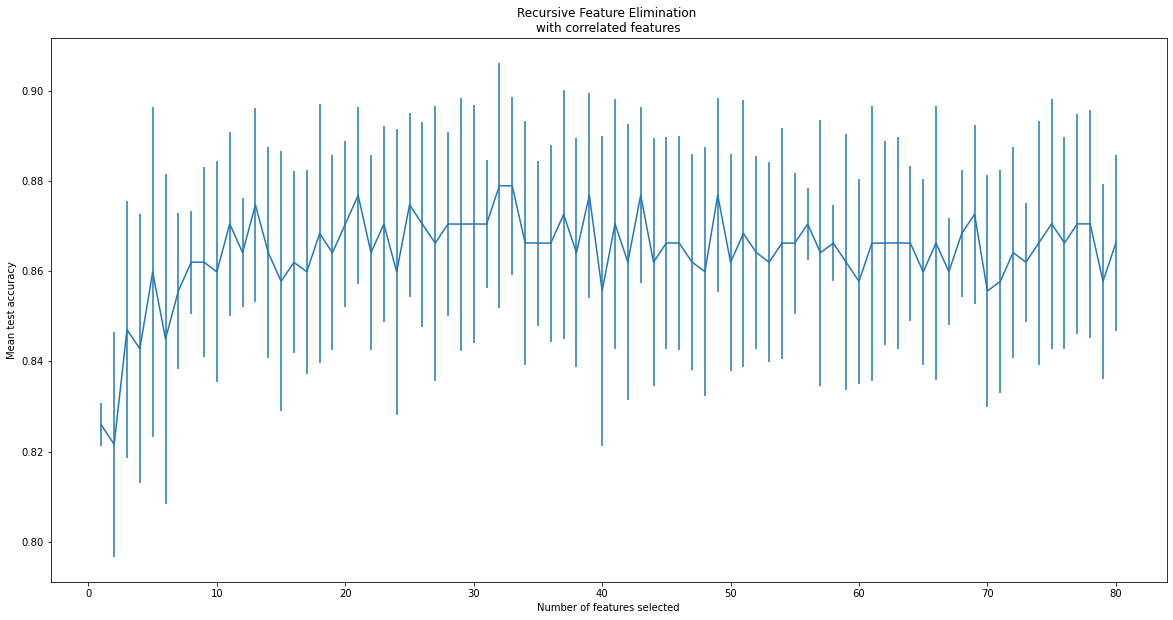

In [18]:
data = {
    key: value
    for key, value in rfecv.cv_results_.items()
    if key in ["n_features", "mean_test_score", "std_test_score"]
}
cv_results = pd.DataFrame(data)
plt.figure(figsize=(20, 10))
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [19]:
rfecv = RFECV(estimator=rfc, scoring='accuracy')
rfecv.fit(X_res_train, y_res_train)
rfecv.score(X_test, y_test)

0.8343949044585988

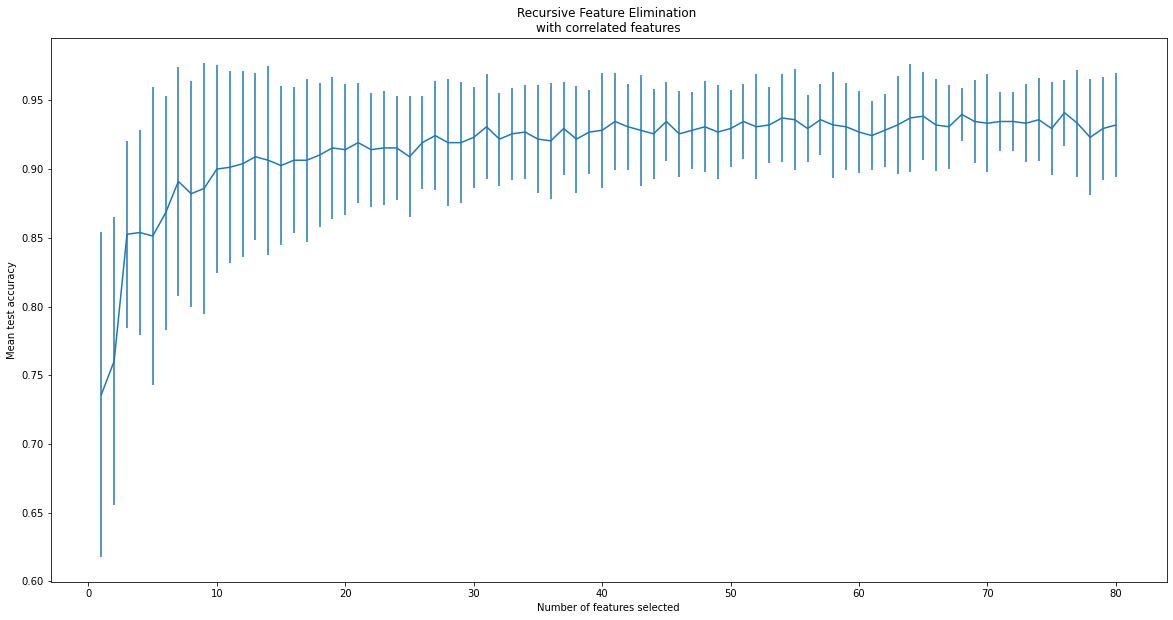

In [20]:
data = {
    key: value
    for key, value in rfecv.cv_results_.items()
    if key in ["n_features", "mean_test_score", "std_test_score"]
}
cv_results = pd.DataFrame(data)
plt.figure(figsize=(20, 10))
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [21]:
rfe = RFE(estimator = rfc , n_features_to_select=12)
rfe.fit(X_res_train, y_res_train)
rfe.score(X_train, y_train), rfe.score(X_test, y_test)

(0.9851380042462845, 0.7898089171974523)

In [22]:
rfe.get_feature_names_out()

array(['pt_max', 'bilirubin_total_max', 'bun_max', 'rdw_max', 'NPAR',
       'sapsii', 'sofa', 'cci', 'apsiii', 'temperature_mean',
       'vasopressin', 'has_sepsis'], dtype=object)

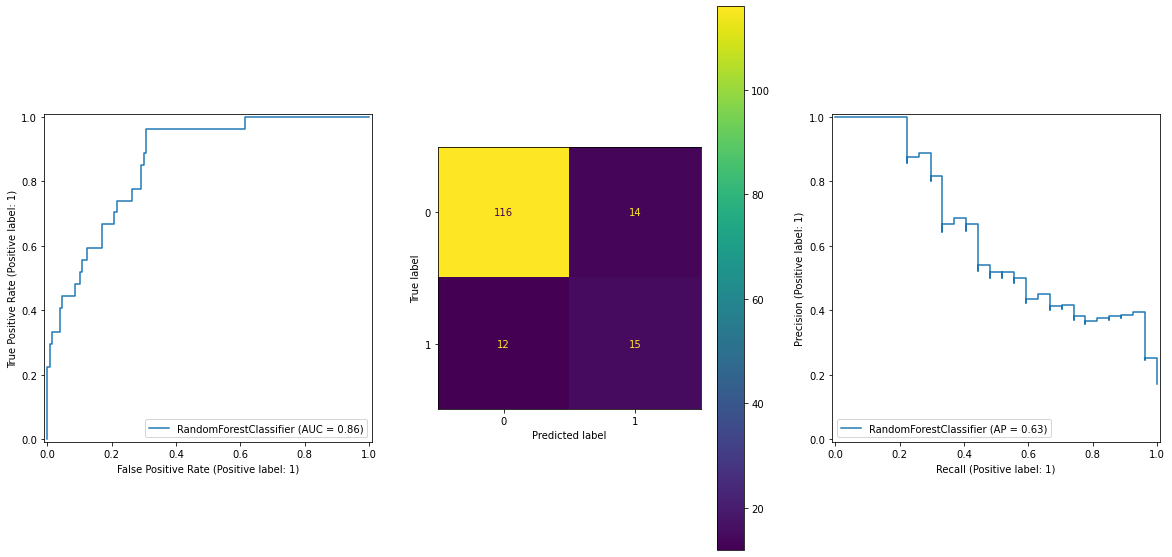

In [23]:
rfc = RandomForestClassifier(random_state=2026, criterion='entropy', max_depth=9, min_samples_leaf=2, min_samples_split=2)
rfc.fit(X_res_train, y_res_train)
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 10))
RocCurveDisplay.from_estimator(estimator=rfc, X=X_test, y=y_test, ax=axes[0])
ConfusionMatrixDisplay.from_estimator(estimator=rfc, X=X_test, y=y_test, ax=axes[1])
PrecisionRecallDisplay.from_estimator(estimator=rfc, X=X_test, y=y_test, ax=axes[2])
plt.show()


In [24]:
cols_sel = rfe.get_feature_names_out().tolist()
X_sel = df[cols_sel]
X_sel_train, X_sel_test, y_sel_train, y_sel_test = train_test_split(X_sel, y, random_state=2026)
X_sel_res_train, y_sel_res_train = smote.fit_resample(X_sel_train, y_sel_train)
X_sel_res_train.shape, y_sel_res_train.shape


C:\Users\nam09\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


((780, 12), (780,))

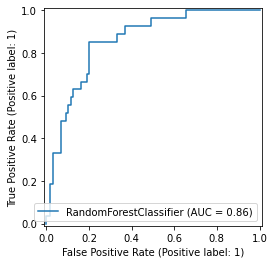

In [25]:
rfc = RandomForestClassifier(random_state=2026, criterion='entropy', max_depth=9, min_samples_leaf=2, min_samples_split=2)
rfc.fit(X_sel_res_train, y_sel_res_train)
RocCurveDisplay.from_estimator(estimator=rfc, X=X_sel_test, y=y_test)
plt.show()


In [26]:
rfc.feature_names_in_

array(['pt_max', 'bilirubin_total_max', 'bun_max', 'rdw_max', 'NPAR',
       'sapsii', 'sofa', 'cci', 'apsiii', 'temperature_mean',
       'vasopressin', 'has_sepsis'], dtype=object)

In [27]:
joblib.dump(rfc, 'npar/rfc.joblib')

['npar/rfc.joblib']

In [31]:
joblib.dump(X_sel_res_train, 'npar/X_train.joblib')
joblib.dump(X_sel_res_train, 'npar/y_train.joblib')

['npar/y_train.joblib']

In [28]:
rfe = RFE(estimator=rfc, n_features_to_select=12)
rfe.fit(X_res_train, y_res_train)
rfe.score(X_train, y_train), rfe.score(X_test, y_test)


(0.9851380042462845, 0.7898089171974523)

In [29]:
rfe.get_feature_names_out(), len(rfe.get_feature_names_out())

(array(['pt_max', 'bilirubin_total_max', 'bun_max', 'rdw_max', 'NPAR',
        'sapsii', 'sofa', 'cci', 'apsiii', 'temperature_mean',
        'vasopressin', 'has_sepsis'], dtype=object),
 12)

In [30]:
cols_selected = ['pt_max', 'bilirubin_total_max', 'bun_max', 'rdw_max', 'NPAR',
                 'sapsii', 'sofa', 'cci', 'apsiii', 'temperature_mean',
                 'vasopressin', 'has_sepsis']
df[cols_selected].min(), df[cols_selected].max()



(pt_max                  8.800000
 bilirubin_total_max   -23.193906
 bun_max                 3.000000
 rdw_max                11.800000
 NPAR                    1.363636
 sapsii                  6.000000
 sofa                    0.000000
 cci                     0.000000
 apsiii                  7.000000
 temperature_mean       33.600000
 vasopressin             0.000000
 has_sepsis              0.000000
 dtype: float64,
 pt_max                 148.700000
 bilirubin_total_max     51.200000
 bun_max                181.000000
 rdw_max                 34.900000
 NPAR                    71.538462
 sapsii                  94.000000
 sofa                    21.000000
 cci                     17.000000
 apsiii                 159.000000
 temperature_mean        40.104118
 vasopressin              1.000000
 has_sepsis               1.000000
 dtype: float64)